# 3. Análisis exploratorio de series temporales

## 3.1. Analisis exploratorio de Series Temporales
Se realiza una exploracion sobre el promedio de bicis rentadas respecto a diferentes temporalidades
1. Bicis rentadas diariamente
2. Bicis promedio rentadaspor hora segun dia de la semana
3. Bicis rentadas promedio por hora del dia
4. Bicis rentadas promedio por hora por mes

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

DATA_PATH = Path("../data/hour.csv")
data = pd.read_csv(DATA_PATH)
data["dteday"] = pd.to_datetime(data["dteday"])
data.shape

DATA_PATH_CLEAN = Path("../data/hour_clean.csv")
df = pd.read_csv(DATA_PATH_CLEAN)
df.shape


# Suavizacion de series temporales
## Agrupar por día y calcular total de bicis rentadas
df_daily = data.groupby("dteday").agg({
    "casual": "mean",
    "registered": "mean"
})
 
# suavizaion de 7 dias
df_daily["casual_suavizada"] = df_daily["casual"].rolling(window=7).mean()
df_daily["registered_suavizada"] = df_daily["registered"].rolling(window=7).mean()

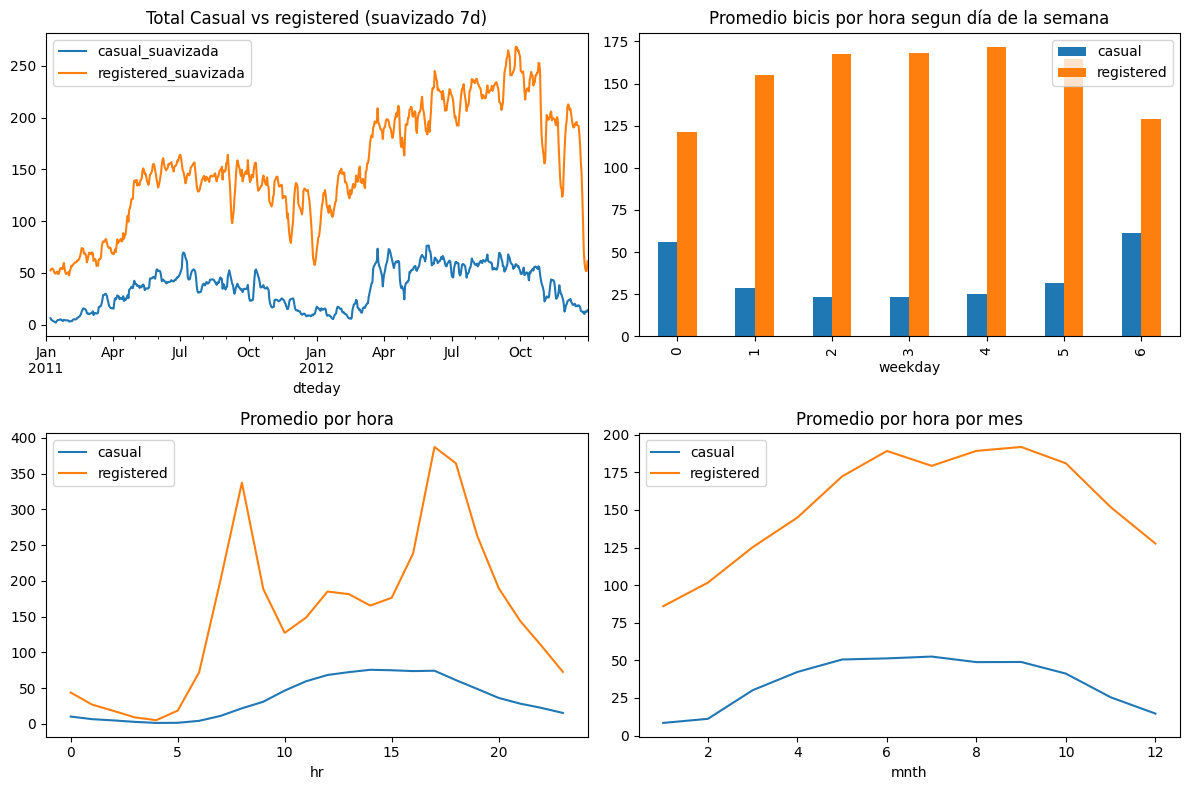

In [2]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
 
# Gráfico diario suavizado
df_daily[["casual_suavizada", "registered_suavizada"]].plot(
    ax=axs[0,0], title="Total Casual vs registered (suavizado 7d)"
)
 
# Promedio por día de la semana
data.groupby("weekday").agg({"casual":"mean", "registered":"mean"}).plot(
    kind="bar", ax=axs[0,1], title="Promedio bicis por hora segun día de la semana"
)
 
# Promedio por hora
data.groupby("hr").agg({"casual":"mean", "registered":"mean"}).plot(
    ax=axs[1,0], title="Promedio por hora"
)
 
# Promedio por mes
data.groupby("mnth").agg({"casual":"mean", "registered":"mean"}).plot(
    ax=axs[1,1], title="Promedio por hora por mes"
)
 
plt.tight_layout()
plt.show()

1. **Casual vs Registered (diario suavizado)**
    Este gráfico muestra la evolución diaria del uso de bicicletas por parte de usuarios casuales y registrados entre enero de 2011 y diciembre de 2012.
    Se aplicó un suavizado de 7 días para eliminar el ruido diario y resaltar la tendencia general.
    Los usuarios registrados tienen consistentemente mayor volumen de uso que los casuales.
    Se observan picos estacionales, especialmente en los meses cálidos, lo que sugiere una fuerte influencia del clima en la demanda.
   
2. **Promedio de bicicletas por hora según día de la semana**
    Este gráfico de barras compara el promedio de bicicletas utilizadas por hora en cada día de la semana.
    Los usuarios registrados muestran mayor actividad en todos los días, con una distribución relativamente estable.
    Los usuarios casuales tienen menor volumen, pero tienden a usar más las bicicletas en fines de semana, lo que podría indicar un uso recreativo.
   
4. **Promedio por hora**
    Este gráfico muestra cómo varía el uso de bicicletas a lo largo del día.
    Los usuarios registrados presentan dos picos claros: uno en la mañana (alrededor de las 8 AM) y otro en la tarde (5–6 PM), reflejando patrones de movilidad laboral.
    Los usuarios casuales tienen un uso más disperso, con un aumento gradual durante el día y un pico más suave en la tarde.

4. **Promedio por hora por mes**
    Aquí se observa el promedio de uso por hora en cada mes del año.
    Ambos tipos de usuarios incrementan su actividad en los meses cálidos (mayo a octubre).
    Los registrados mantienen un volumen alto incluso en meses fríos, mientras que los casuales disminuyen notablemente, lo que refuerza la idea de que el uso casual está más ligado al clima.

## 3.2. Influencia de factores ambientales
Para entender el efecto de las diferentes variables ambientales se traza un grafico de dispersion de la temperatura, humedad y velocidad del viento vs el promedio de bicis rentadas, esto con el fin de encontrar relaciones o influencias de las variables en la variable objetivo.

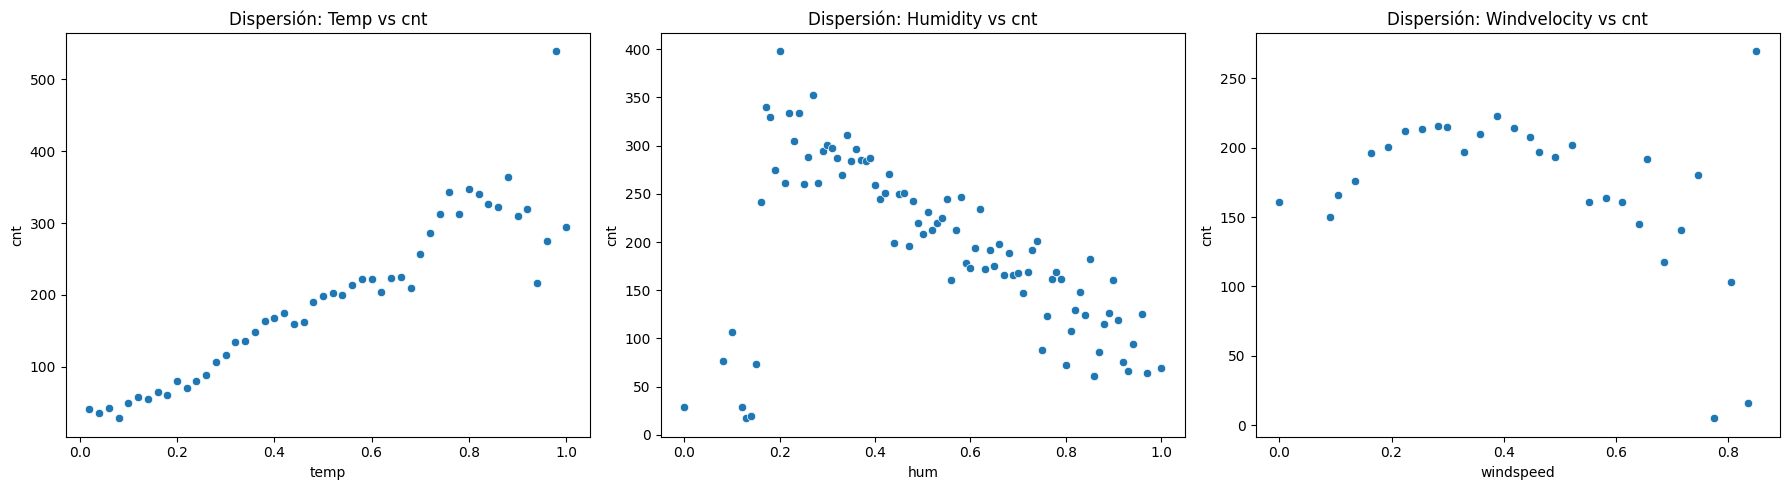

In [3]:
## Graficos de dispersion 

fig, axs = plt.subplots(1, 3, figsize=(18, 5)) ## ajustar a 1 fila 3 columnas de graficos

#--------------------------
g1= data.groupby('temp')["cnt"].mean().reset_index() 
sns.scatterplot(x=g1["temp"], y=g1["cnt"], ax=axs[0])
axs[0].set_title("Dispersión: Temp vs cnt")
#--------------------------
g2= data.groupby('hum')["cnt"].mean().reset_index()
sns.scatterplot(x=g2["hum"], y=g2["cnt"], ax=axs[1])
axs[1].set_title("Dispersión: Humidity vs cnt")
#--------------------------
g3= data.groupby('windspeed')["cnt"].mean().reset_index()
sns.scatterplot(x=g3["windspeed"], y=g3["cnt"], ax=axs[2])
axs[2].set_title("Dispersión: Windvelocity vs cnt")
#--------------------------
plt.tight_layout()
plt.show()

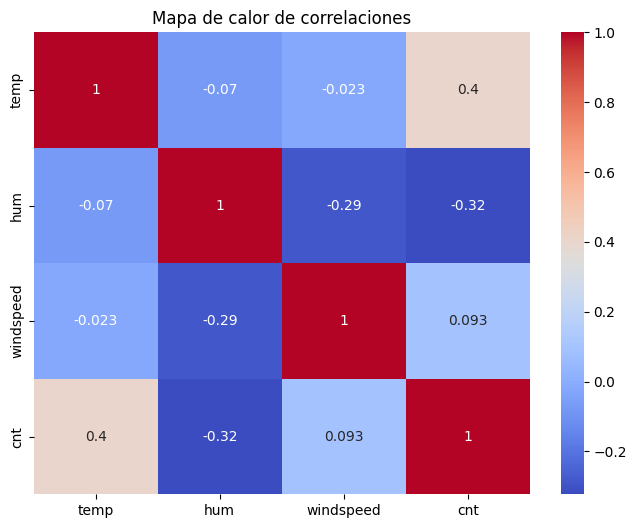

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data[["temp","hum","windspeed","cnt"]].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Mapa de calor de correlaciones")
plt.show()

Notemos que la influencia de la temperatura es positiva sobre la cantidad de bicis rentadas, no es la razon principal de su demanada pero si explica en parte la tendencia a que cuando hace buen clima, las personas prefieran este medio de transporte.
A su vez, la humedad muestra disminuir las rentas de bicis a medida esta aumenta, indicador de que si el clima se torna con mucha humedad, existira un efecto a la baja en la renta de bicicletas. 
Por otro lado, la velocidad del viento, no denota una relacion lineal clara a la renta de bicicletas, esto puede denotar corrientes de aire moderadas dentro de la ciudad que no afectan a la utilizacion de este medio de transporte o variaciones a lo largo del dia.